In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

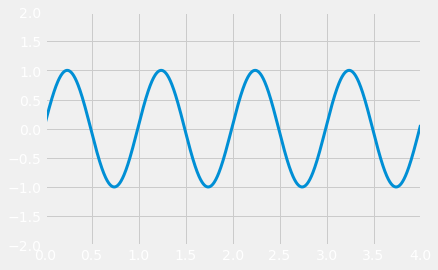

In [35]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

In [3]:
from IPython.display import IFrame

In [4]:
IFrame('sine_wave.gif', width=800, height=400)

In [5]:
import matplotlib.animation as animation
plt.style.use('dark_background')

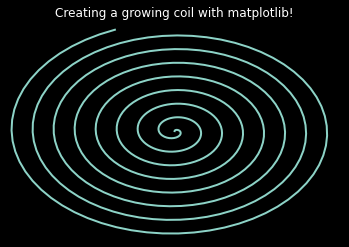

In [6]:
fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
	# t is a parameter 
	t = 0.1*i 
	
	# x, y values to be plotted 
	x = t*np.sin(t) 
	y = t*np.cos(t) 
	
	# appending new points to x, y axes points list 
	xdata.append(x) 
	ydata.append(y) 
	line.set_data(xdata, ydata) 
	return line, 
	
# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
							frames=500, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('coil.gif',writer='imagemagick') 

In [7]:
IFrame('coil.gif', width=800, height=300)

In [8]:
plt.style.use('fivethirtyeight')

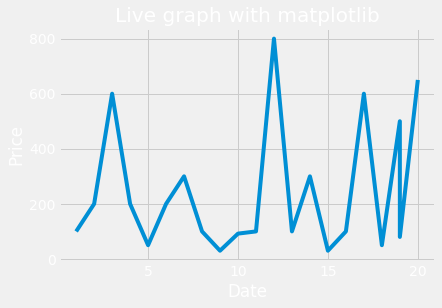

In [16]:
fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    data = open('stock.txt','r').read()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') # Delimiter is comma    
        xs.append(float(x))
        ys.append(float(y))
   
    
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')	
	
    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
ani.save('stock.gif',writer='imagemagick') 
plt.show()

In [17]:
IFrame('stock.gif', width=800, height=500)

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/home/maikeldf/.cache/pypoetry/virtualenvs/numerai-_XpcWUqr-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


'\nThis will create multiple PNG files in the VOlcano folder. \nNow, use ImageMagick to transform them into animation. \nOpen Terminal and navigate to the Volcano folder and enter the following command:'

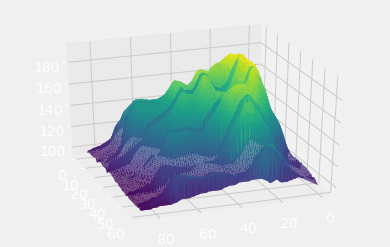

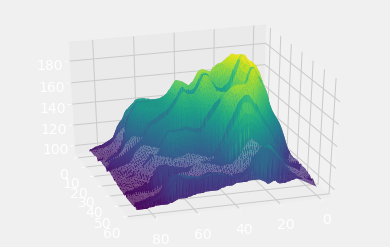

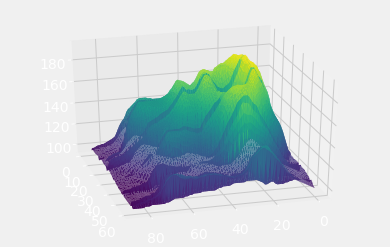

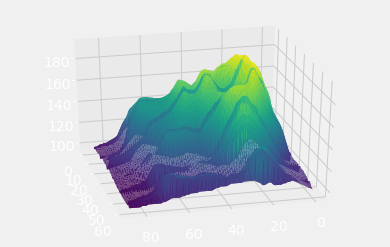

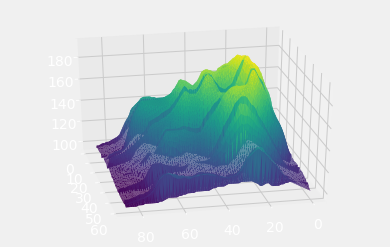

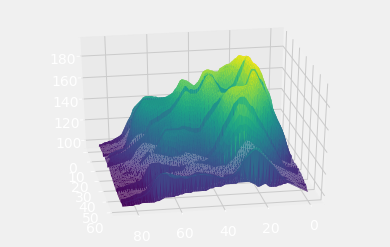

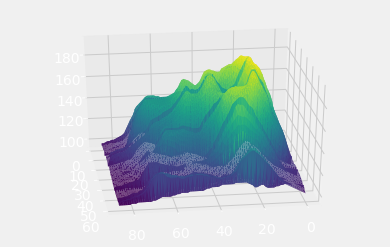

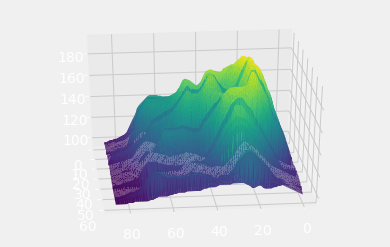

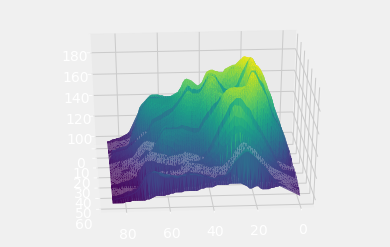

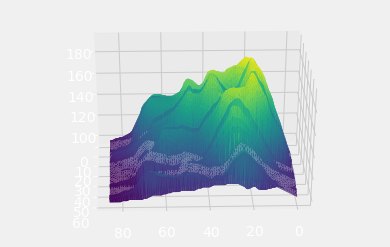

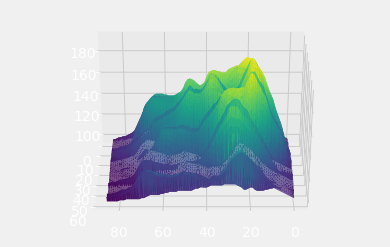

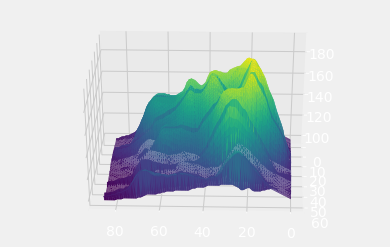

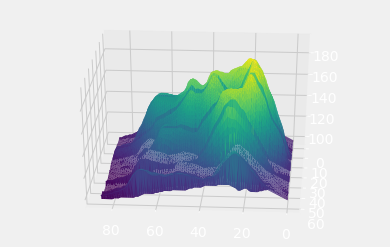

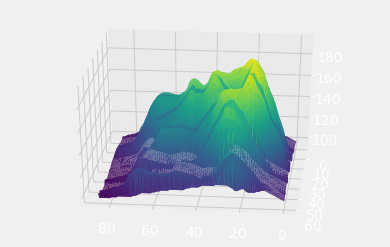

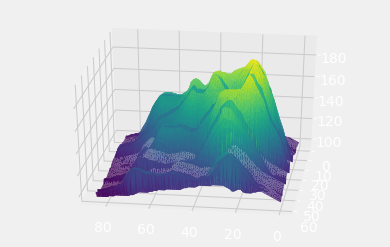

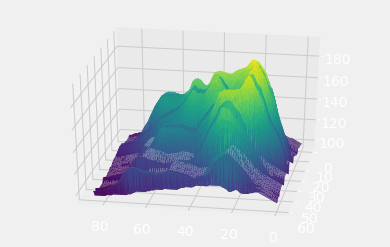

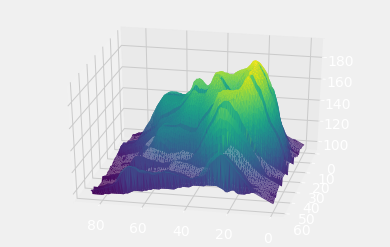

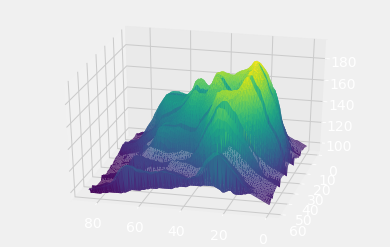

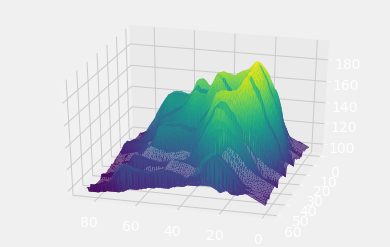

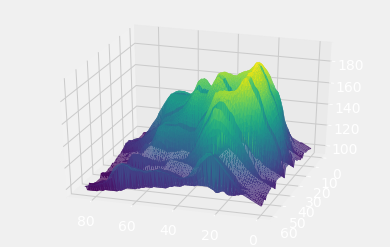

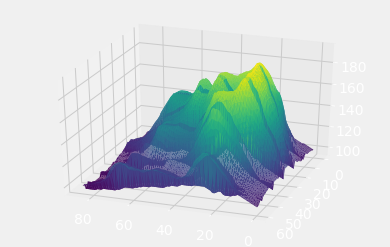

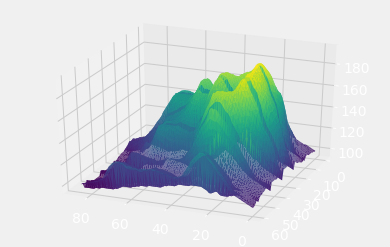

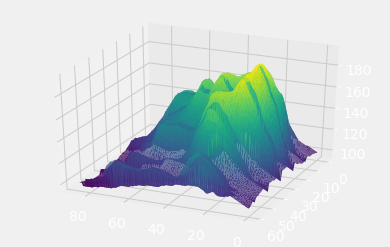

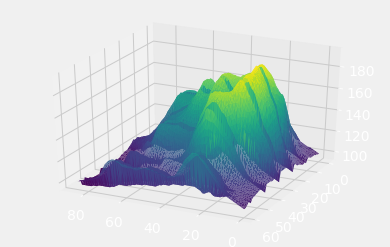

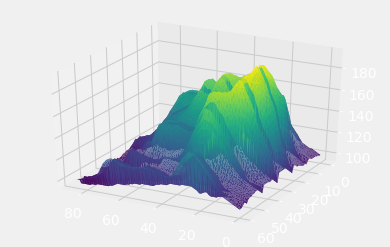

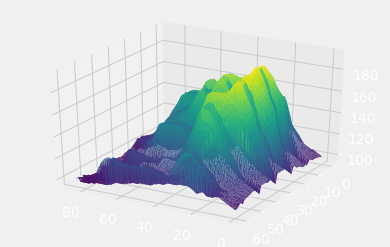

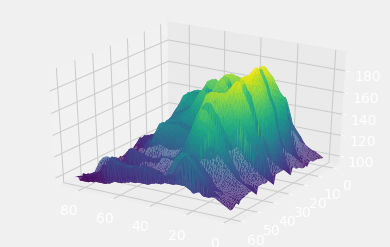

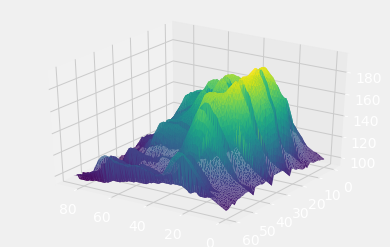

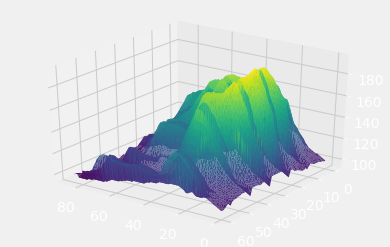

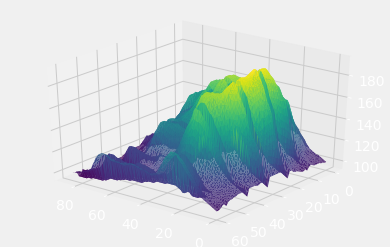

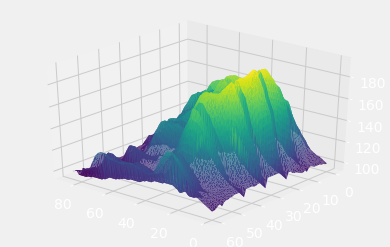

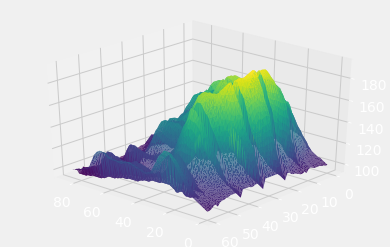

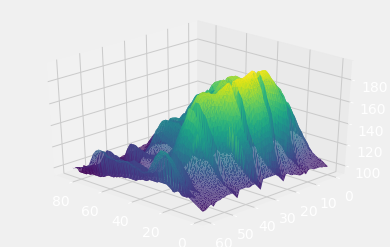

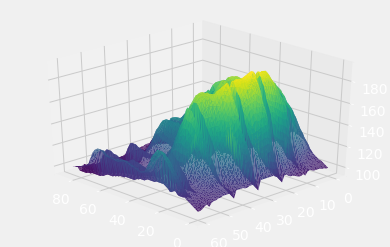

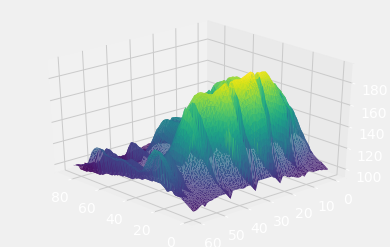

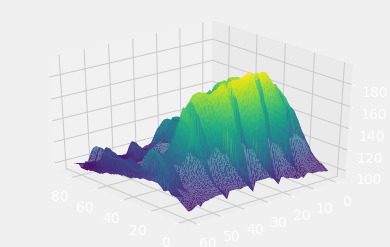

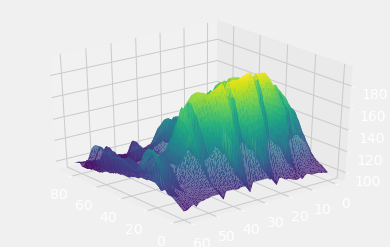

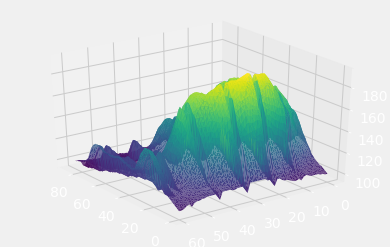

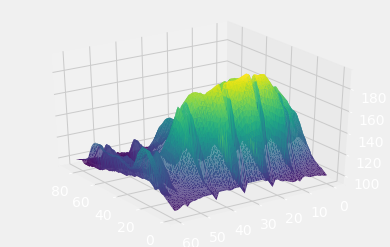

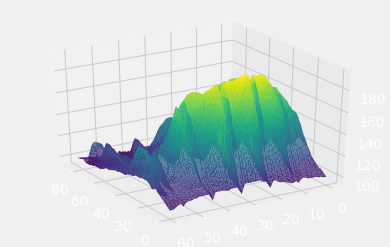

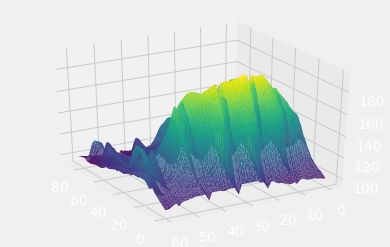

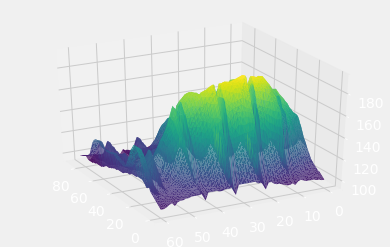

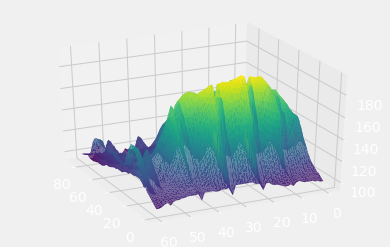

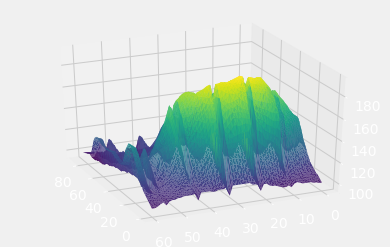

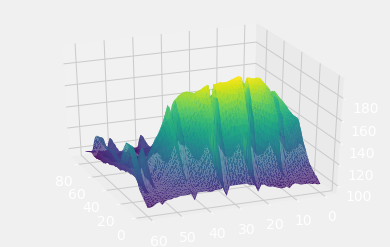

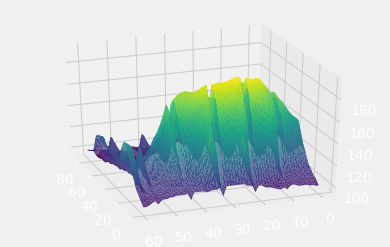

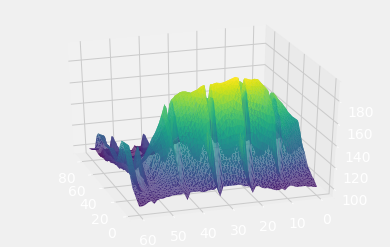

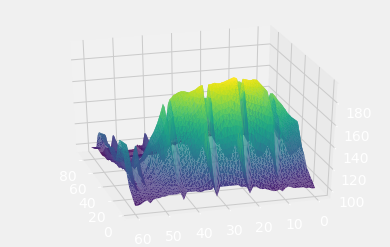

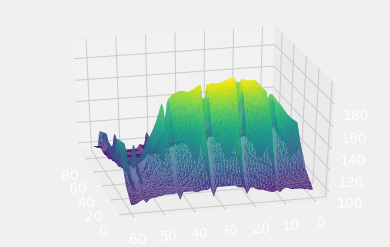

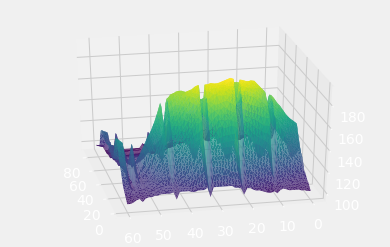

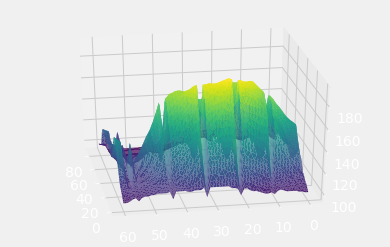

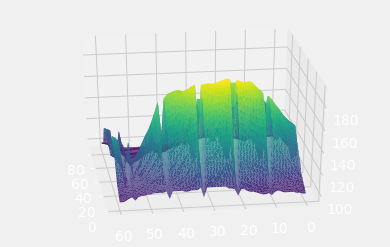

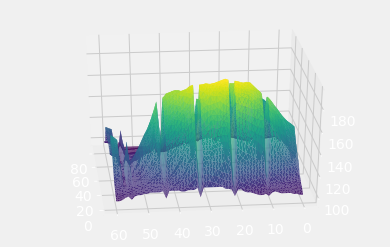

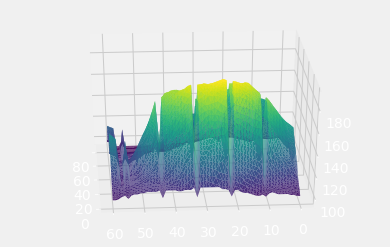

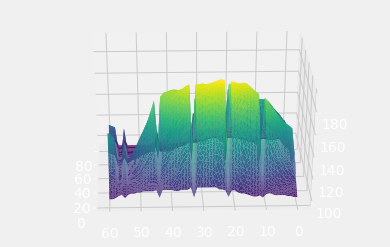

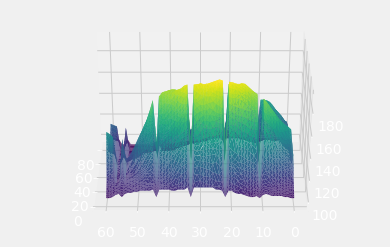

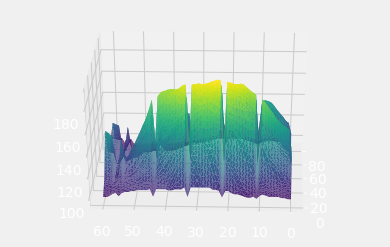

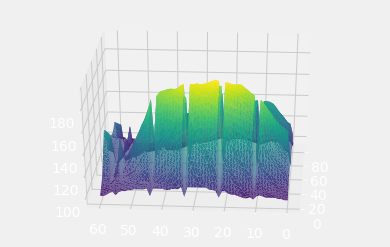

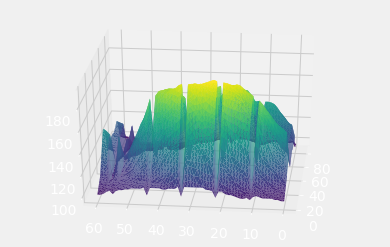

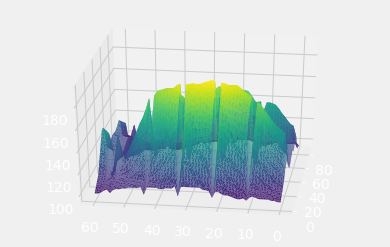

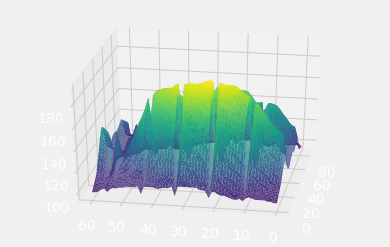

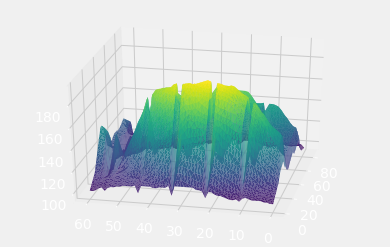

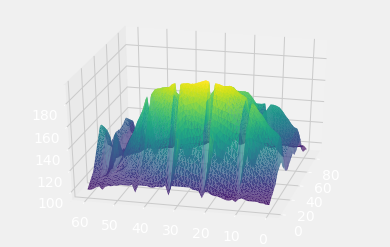

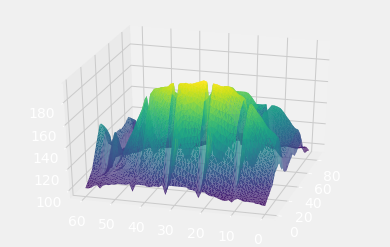

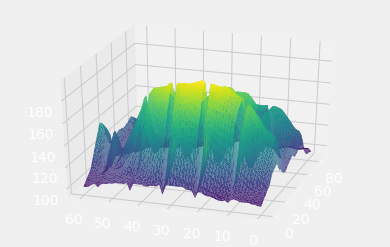

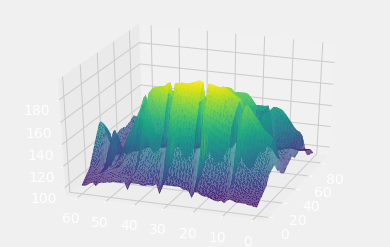

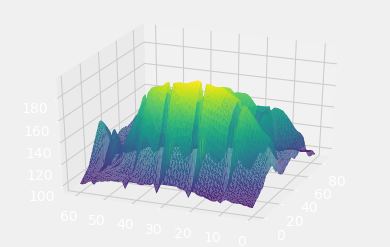

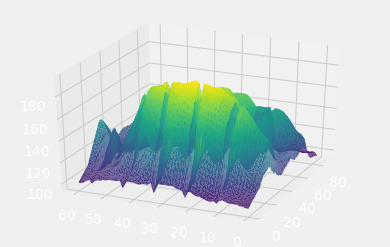

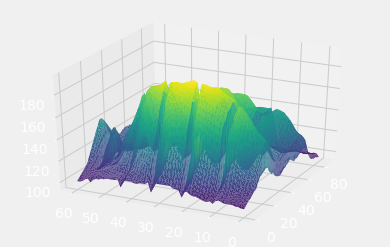

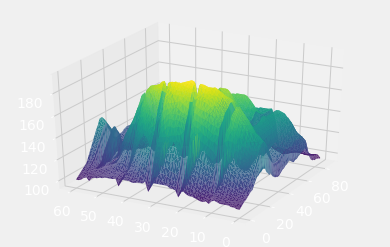

In [21]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)

# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]

# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes

# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):

# Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

    ax.view_init(30,angle)

    filename='Volcano/Volcano_step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    
    
"""
This will create multiple PNG files in the VOlcano folder. 
Now, use ImageMagick to transform them into animation. 
Open Terminal and navigate to the Volcano folder and enter the following command:"""

# convert -delay 10 Volcano*.png animated_volcano.gif

In [23]:
import os

In [24]:
os.system("convert -delay 10 Volcano/Volcano*.png Volcano/animated_volcano.gif")

0

In [25]:
IFrame('Volcano/animated_volcano.gif', width=800, height=350)

In [27]:
from matplotlib import pyplot as plt
from celluloid import Camera

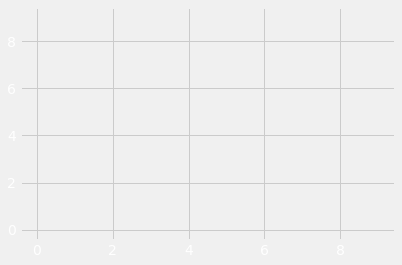

In [28]:
fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
animation = camera.animate()
animation.save('celluloid_minimal.gif', writer = 'imagemagick')

In [29]:
IFrame('celluloid_minimal.gif', width=800, height=350)

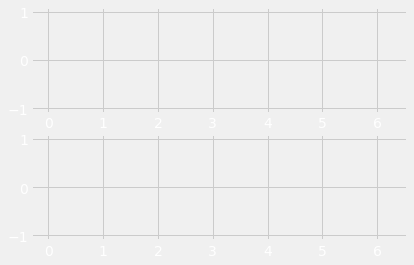

In [30]:
fig, axes = plt.subplots(2)
camera = Camera(fig)
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)
for i in t:
    axes[0].plot(t, np.sin(t + i), color='blue')
    axes[1].plot(t, np.sin(t - i), color='blue')
    camera.snap()
    
animation = camera.animate()  
animation.save('celluloid_subplots.gif', writer = 'imagemagick')

In [31]:
IFrame('celluloid_subplots.gif', width=800, height=350)

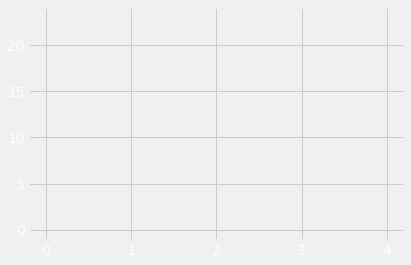

In [32]:
fig = plt.figure()
camera = Camera(fig)
for i in range(20):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()
animation = camera.animate()
animation.save('celluloid_legends.gif', writer = 'imagemagick')

In [33]:
IFrame('celluloid_legends.gif', width=800, height=350)

In [ ]:
"""
Source:
https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
https://mybinder.org/v2/gh/parulnith/Animations-with-Matplotlib/master?filepath=Animations%20with%20Matplotlib.ipynb
http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
"""